In [1]:
%load_ext autoreload
%autoreload 2
import torch 
from torch import nn
from omegaconf import OmegaConf
import torchvision
from torchvision import transforms
from ml_utilities.data.data_utils import calculate_dataset_mean_std, show_image_grid, show_images

In [2]:
# data_dir = '/system/user/beck/pwbeck/data'
data_dir = '/local00/bioinf/beck/data'

In [3]:
# datasets to download (only train sets)
# stanford cars, 
# food-101, 
# cifar100, 
# sun397,
# caltech256, 

In [4]:
# start with cifar100

# download cifar100
# cf100 = torchvision.datasets.CIFAR100(data_dir, train=True, download=True, transform=torchvision.transforms.ToTensor())

In [5]:
# calculate_dataset_mean_std(cf100)

In [10]:
def download_dataset_calc_normalizer(dataset_class, data_dir, train=True):
    # same_size = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
    # same_size = transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224))])
    same_size = transforms.Compose([transforms.ToTensor()])

    try:
        dataset = dataset_class(data_dir, train=train, download=True, transform=same_size)
    except TypeError:
        try:
            dataset = dataset_class(data_dir, split='train', download=True, transform=same_size)
        except TypeError:
            dataset = dataset_class(data_dir, download=True, transform=same_size)
    mean, std = calculate_dataset_mean_std(dataset, num_workers=12)
    normalizer_str = f"{dataset_class.__name__}_NORMALIZER = {{'mean': {mean.tolist()}, 'std': {std.tolist()}}}"
    return normalizer_str

In [11]:
ds_classes = [torchvision.datasets.SVHN]
# torchvision.datasets.CIFAR100, torchvision.datasets.StanfordCars, torchvision.datasets.Food101, torchvision.datasets.SUN397, torchvision.datasets.Flowers102, 
normalizer_strs = []
for ds_class in ds_classes:
    print(ds_class)
    normalizer_strs.append(download_dataset_calc_normalizer(ds_class, data_dir))

<class 'torchvision.datasets.svhn.SVHN'>
Using downloaded and verified file: /local00/bioinf/beck/data/train_32x32.mat
100%|██████████| 287/287 [00:02<00:00, 124.25it/s]


In [12]:
print(normalizer_strs[0])

SVHN_NORMALIZER = {'mean': [0.437682181596756, 0.4437696933746338, 0.4728044271469116], 'std': [0.1200864240527153, 0.12313701957464218, 0.10520392656326294]}


In [25]:
print(normalizer_strs[0])

Food101_NORMALIZER = {'mean': [0.5450313091278076, 0.44354042410850525, 0.34364208579063416], 'std': [0.2302699089050293, 0.24098420143127441, 0.2388743758201599]}


In [30]:
print(normalizer_strs[1])

Flowers102_NORMALIZER = {'mean': [0.4329557418823242, 0.38192424178123474, 0.2964075207710266], 'std': [0.2588456869125366, 0.20939205586910248, 0.22115884721279144]}


In [ ]:
ds = torchvision.datasets.Caltech101()

In [24]:
# ds = torchvision.datasets.StanfordCars(data_dir, split='train', download=True, transform=torchvision.transforms.ToTensor())
# ds = torchvision.datasets.SVHN(data_dir, split='train', download=True, transform=torchvision.transforms.ToTensor())
# ds = torchvision.datasets.Food101(data_dir, split='train', download=True, transform=transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()]))
# ds = torchvision.datasets.SUN397(data_dir, download=True, transform=transforms.Compose([transforms.Resize((224, 224))]))
ds = torchvision.datasets.Flowers102(data_dir, split='test', download=True, transform=transforms.Compose([transforms.Resize((224, 224))]))

In [25]:
len(ds)

6149

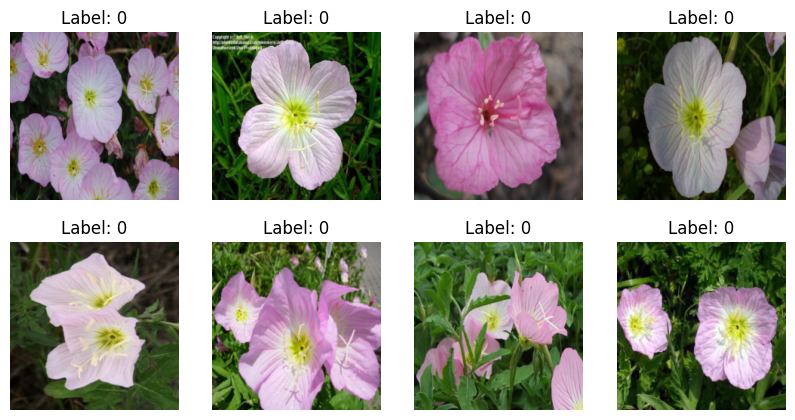

In [18]:
show_images(ds, num_images=8, shuffle=False)

In [11]:
ds2 = torchvision.datasets.StanfordCars(data_dir, split='train', download=True, transform=torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)), torchvision.transforms.ToTensor()]))

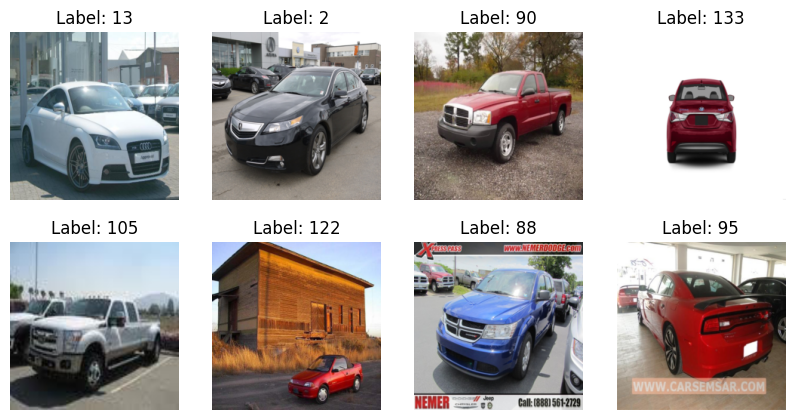

In [12]:
show_images(ds2, num_images=8)

In [16]:
import numpy as np
np.array([0.485, 0.456, 0.406])[:,None].tolist()

[[0.485], [0.456], [0.406]]

In [19]:
from torchvision import transforms 
imn = torchvision.datasets.ImageNet('/system/user/publicdata/ImageNet/ImageNet1K', split='train', transform= transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor()]))

In [20]:
len(imn)

1281167

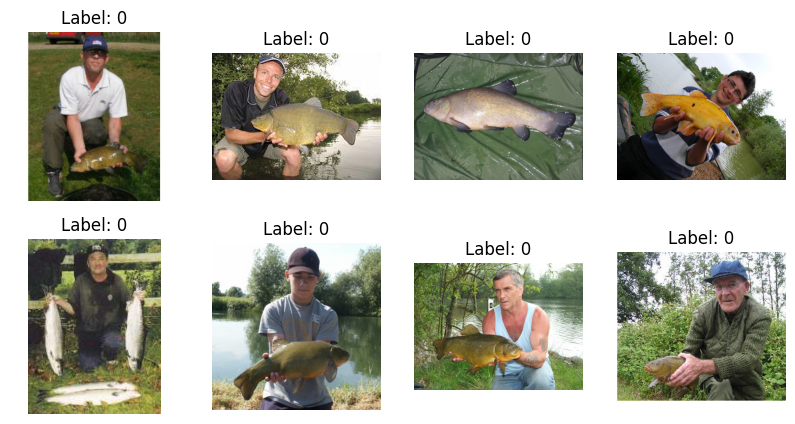

In [10]:
show_images(imn, num_images=8, shuffle=False)

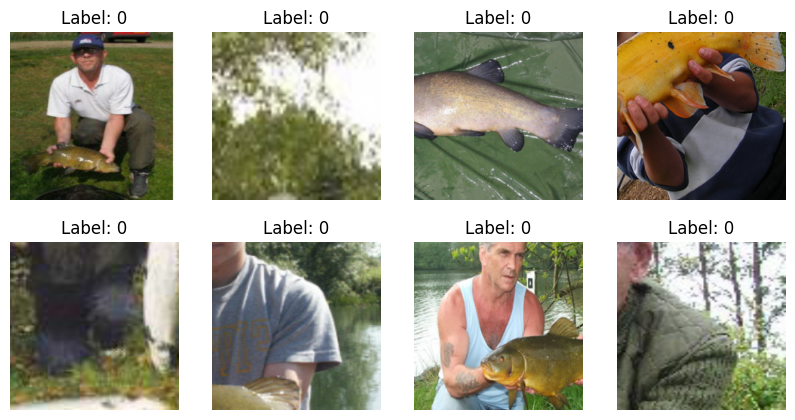

In [12]:
show_images(imn, num_images=8, shuffle=False)